# 앙상블
- 단일 결정트리(DecisionTree)의 단점을 극복하기 위해서 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 방법
- 주어진 자료로부터 여러 개의 예측 모형을 만든 후 예측 모형을 조합하여 하나의 예측모형을 생성하는 과정
- 대표적인 기법: 배깅, 부스팅, 랜덤포레스트

# 배깅
- 주어진 자료를 모집단으로 간주하여 주어진 자료에서 여러 개의 부트스트랩 자료를 생성하고 각각의 부트스트랩 자료에 예측 모형을 만든 후 결합하여 최종의 예측 모델을 생성
- 장점
    - 분산을 줄이고 과적합 문제를 완화
    - 안정적인 성능 보장
    - 비선형성 데이터와 노이즈 데이터에 대한 문제 완화
- 매개변수
    - estimator
        - 기본값: None
        - 기본 추정기 (모델 선택)
    - n_estimators
        - 기본값: 10
        - 생성할 추정기(모델)
    - max_samles
        - 기본값: 1.0
        - 모델에 사용할 데이터의 비율 (1.0인 경우는 모든 데이터를 사용)
    - max_features
        - 기본값: 1.0
        - 모델에 사용할 데이터 컬럼의 비율
    - oob_score
        - 기본값: False
        - oob(out-of-bag)데이터로 일반화 성능을 평가할 것인가?
    - bootstrap
        - 기본값: True
        - 샘플링 데이터 이용 시 중복 데이터의 허용 여부
    - bootstrap_feature
        - 기본값: False
        - 샘플링 데이터 이용시 중복 컬럼의 허용 여부
    - warm_start
        - 기본값: False
        - 이전 학습에 이어서 추가 학습의 여부
    - n_jobs
        - 기본값: None
        - CPU의 병렬처리 개수(-1 사용 시 전체 CPU 사용)
- 속성
    - estimators_
        - 학습된 모델의 리스트
    - estimators_samples_
        - 각 모델이 학습한 샘플의 인덱스(행의 위치)
    - estimators_features_
        - 각 모델이 학습한 샘플의 컬럼의 인덱스(열의 위치)
    - oob_score
        - OOB데이터 기반 정확도
    - oob_decision_function_
        - OOB 데이터의 클래스별 예측 확률
    - classes_
        - 분류 클래스의 레이블
    - n_classes_
        - 클래스의 개수
- 메서드
    - fit(x, y)
        - 모델 학습
    - predict(X)
        - 모델의 예측
    - predict_proba(X)
        - 클래스별 예측 확률(모델이 predict_proba()를 지원하는 경우에만 사용가능)
    - score(X, y)
        - 정확도 평가
    - fit_predict(X, y)
        - 학습 후 바로 예측 수행 (학습데이터를 이용한 예측)
        

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix

In [17]:
breast = pd.read_csv('../data_git/data/breast-cancer.csv')

In [18]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
# diagnois 데이터의 개수를 확인
breast['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

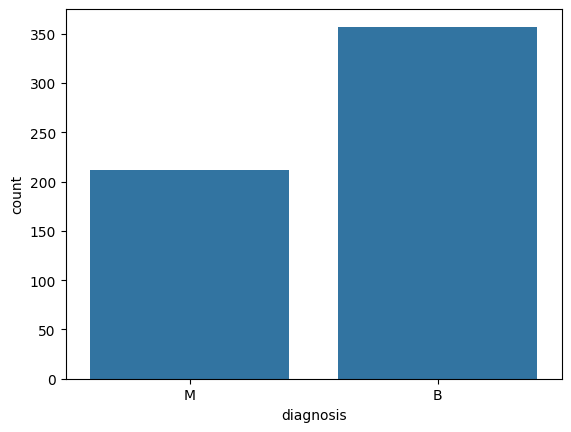

In [20]:
sns.countplot(data = breast, x = 'diagnosis')

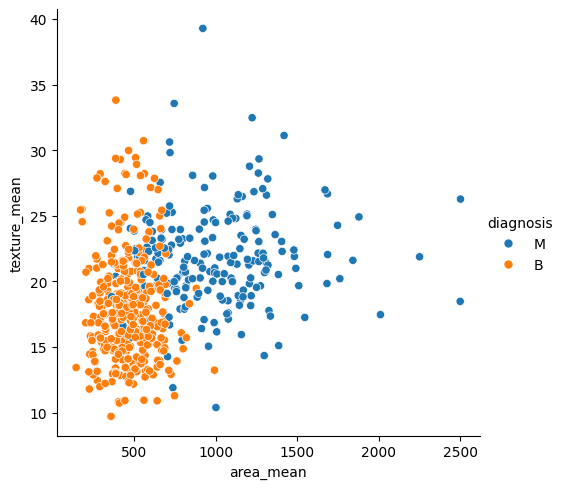

In [21]:
# 특정 컬럼의 선택하여 학습, 예측
# 독립변수 area_mean, texture_mean
# 산점도 그래프 
sns.relplot(
    data = breast, 
    x = 'area_mean',
    y = 'texture_mean',
    hue = 'diagnosis'
    )

In [22]:
# 진단 결과 diagnosis의 데이터를 M은 1로 B는 0으로 변환
breast['class'] = breast['diagnosis'].replace('M', 1).replace('B', 0)

/var/folders/v0/r6b3g15j6gd1x8947g8ly2qr0000gn/T/ipykernel_39521/2098983459.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  breast['class'] = breast['diagnosis'].replace('M', 1).replace('B', 0)


In [23]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,class
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [24]:
x = breast[['area_mean', 'texture_mean']].values
y = breast['class'].values

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, 
    test_size=0.3,
    random_state=42,
    stratify = y
)

In [36]:
# 배깅을 이용하여 분류기를 생성하고 예측
clf = BaggingClassifier(estimator=DecisionTreeClassifier)

In [40]:
clf = BaggingClassifier(estimator=DecisionTreeClassifier())

clf.fit(X_train, Y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [42]:
pred = clf.predict(X_test)

In [43]:
clf.score(X_test,Y_test)

0.8888888888888888

In [53]:
pd.DataFrame(
    confusion_matrix(pred, Y_test),
    index = ['actual[0]', 'actual[1]'],
    columns = ['pred[0]', 'pred[1]']
)

,pred[0],pred[1]
actual[0],103,15
actual[1],4,49


In [45]:
tree = DecisionTreeClassifier(max_depth = 4)

In [47]:
tree.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [48]:
pred_tree = tree.predict(X_test)

In [49]:
tree.score(X_test, Y_test)

0.9122807017543859

In [52]:
confusion_matrix(Y_test, pred_tree)

array([[101,   6],
       [  9,  55]])

In [58]:
# oob score 사용
clf_oob = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth = 4), oob_score=True)
clf_oob.fit(X_train, Y_train)

/Users/eunseo/Documents/data_boot/venv/lib/python3.13/site-packages/sklearn/ensemble/_bagging.py:917: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/eunseo/Documents/data_boot/venv/lib/python3.13/site-packages/sklearn/ensemble/_bagging.py:923: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


,estimator,DecisionTreeC...r(max_depth=4)
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,True
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [61]:
clf_oob.oob_score_

0.8844221105527639

In [62]:
clf_oob.score(X_test, Y_test)

0.9005847953216374

In [63]:
# 배깅 방식으로 회귀 분석
# 자동자
car = pd.read_csv('../data_git/data/CarPrice_Assignment.csv')

In [64]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [65]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [76]:
# car 데이터프레임에서 dtype이 숫자형인 컬럼들만 필터
# 선택(select) + 데이터의 타입(dtypes)
# 내가 원하는 dtypes 컬럼만 선택
# car.select_dtypes(['int','float'])
car_num = car.select_dtypes('number')

In [84]:
# 독립변수, 종속변수
x = car_num.drop(['car_ID', 'symboling', 'price'], axis=1).values
y = car_num['price'].values 

In [85]:
# 배깅을 이용한 회귀분석을 위해 라이브러리 로드
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [89]:
reg = BaggingRegressor(estimator=DecisionTreeRegressor(), oob_score=True)

In [90]:
reg.fit(X_train, Y_train)

/Users/eunseo/Documents/data_boot/venv/lib/python3.13/site-packages/sklearn/ensemble/_bagging.py:1464: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


,estimator,DecisionTreeRegressor()
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,True
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [91]:
reg.oob_score_

0.833098829254446

In [92]:
from sklearn.metrics import r2_score

In [93]:
pred_reg = reg.predict(X_test)

In [94]:
r2_score(Y_test, pred_reg)

0.9303809653282089